In [1]:
!pip install gensim # Instalamos la biblioteca de python para el PLN

In [2]:
from gensim.models import KeyedVectors # Almacena y/o consulta vectores de palabras
from gensim.downloader import load # Sirve para cargar modelos pre-entrenados

# Cargamos el modelo GloVw similar a Word2Vec (160 MB)
model = load('glove-wiki-gigaword-100') # Contiene 100 dimensiones

In [3]:
# Obtenemos el embedding de una palabra
word = "king" # El modelo solo admite palabras en inglés porque fue entrenado de esa manera
vector = model[word] # Le pasamos nuestra palabra al modelo y nos devuelve el vector correspondiente a esa palabra

# Imprimimos algunos resultados
print(f"Vector de '{word}':\n", vector)
print(f"Dimensiones: {len(vector)}")

Vector de 'king':
 [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.61915  -0.33089  -0.52881


In [4]:
model.most_similar(word) # Calculamos las palabras están más relacionadas con nuestra palabra indicada

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

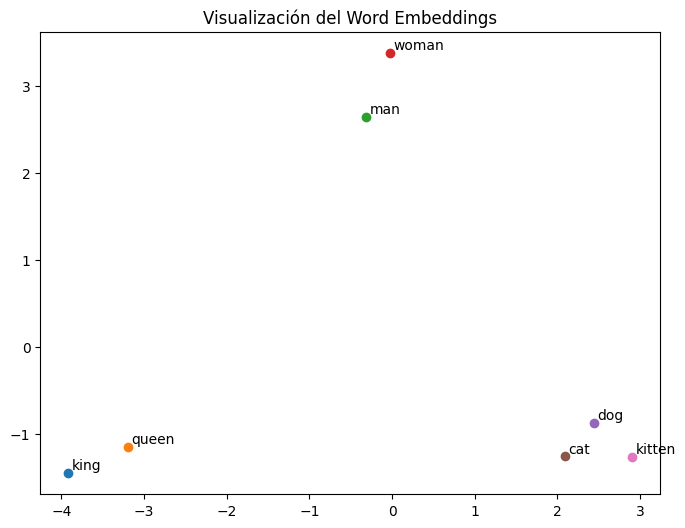

In [5]:
# Seleccionamos palabras al azar y proyectamos a 2D para visualizar sus relaciones
from sklearn.decomposition import PCA # Nos servirá para la reducción de dimensionalidad
import matplotlib.pyplot as plt # Biblioteca útil para graficar los embeddings

words = ["king", "queen", "man", "woman", "dog", "cat", "kitten"] # Palabras
vectors = [model[w] for w in words] # Obtenemos el vector resulante de cada una de las palabras que indicamos

# Reducimos las dimensiones: 100D -> 2D
pca = PCA(n_components = 2)
reduc = pca.fit_transform(vectors)

# Graficamos
plt.figure(figsize = (8, 6))
for i, word in enumerate(words):
  x, y = reduc[i]
  plt.scatter(x, y)
  plt.text(x + 0.04, y + 0.04, word)
plt.title("Visualización del Word Embeddings")
plt.show()

In [6]:
result = model.most_similar(positive = ["king", "woman"], negative = ["man"])
print(result)

[('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101), ('princess', 0.6520534157752991), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.631171703338623), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


## **La lógica es la siguiente:**

- positive = ["king", "woman"]: El modelo suma los vectores de king (rey) y woman (mujer)  
- negative = ["man"]: Luego, resta el vector de man (hombre) de esa suma

## **La idea es la siguiente:**
- vector("king") - vector("man") = vector("realeza") (Se elimina el concepto masculino)  
  
- vector("realeza") + vector("woman") = vector("reina") (Se añade el concepto de femenino a realeza)  
  
El resultado es que devuelve una lista de tuplas cuyo vector es más cercano al resultado de esa operación